##OpenSearch OSDD Analysis

Note: there's a number for identified OpenSearch responses that's roughly 5,500 - this includes opensearch result sets. The 4K number if OpenSearch OSDDs.


4636 == number of OSDDs.

In [1]:
%matplotlib inline
import pandas as pd
import json as js  # name conflict with sqla
import sqlalchemy as sqla
from sqlalchemy.orm import sessionmaker

pd.set_option("display.max_rows",250)

In [2]:
# grab the clean text from the rds
with open('../local/big_rds.conf', 'r') as f:
    conf = js.loads(f.read())

# our connection
engine = sqla.create_engine(conf.get('connection'))

So what do we see in the 4636 responses?

In [7]:
sql = """select kvps.value, count(kvps.value)
from osdds,
    json_each_text(namespaces) as kvps
group by kvps.value
order by count desc, kvps.value
;"""

In [ ]:
# df = pd.read_sql(sql, engine, index_col='id', parse_dates=['metadata_age'])

In [8]:
df = pd.read_sql(sql, engine)

In [9]:
df
# number of references to a namespace

,value,count
0,http://a9.com/-/spec/opensearch/1.1/,4614
1,http://www.w3.org/XML/1998/namespace,4608
2,http://www.mozilla.org/2006/browser/search/,1053
3,http://a9.com/-/opensearch/extensions/geo/1.0/,69
4,http://a9.com/-/opensearch/extensions/time/1.0/,32
5,http://www.w3.org/2001/XMLSchema,19
6,http://www.w3.org/2001/XMLSchema-instance,19
7,http:/www.mozilla.org/2006/browser/search/,10
8,http://modwebsrv.modaps.eosdis.nasa.gov/opense...,9
9,http://a9.com/-/opensearch/extensions/referrer/,8


In [14]:
# which ones contain both time and geo?

sql = """
select url, 
    case when namespaces::jsonb ? 'geo' then True else False end as contains_geo,
    case when namespaces::jsonb ? 'time' then True else False end as contains_time
from osdds
where namespaces::jsonb ?| array['time', 'geo'];
"""
df = pd.read_sql(sql, engine)

In [15]:
from IPython.display import display
with pd.option_context('display.max_colwidth', 1000):
    display(df)

,url,contains_geo,contains_time
0,http://www.hospitalsdatabase.lshtm.ac.uk/opensearch/description.php,True,False
1,http://nsidc.org/api/opensearch/1.1/dataset/NSIDC-0218/granule/description,True,True
2,http://lance-modis.eosdis.nasa.gov/user_services/dataset_opensearch.xml,True,True
3,http://mapdata.environment.nsw.gov.au/geonetwork/srv/en/portal.opensearch,True,False
4,http://podaac.jpl.nasa.gov/ws/search/granule/osd.xml,True,True
5,http://www.coris.noaa.gov/geoportal/openSearchDescription,True,False
6,http://ladsweb.nascom.nasa.gov/data/dataset_opensearch.xml,True,True
7,http://schemas.opengis.net/opensearchgeo/1.0/examples/osd/osddgeotime01.xml,True,True
8,http://metadata.gis.washington.edu/geoportal/openSearchDescription,True,False
9,http://vnavigator.eumetsat.int/discovery/os-description.xml,True,False


Only 32 of those contain both the time and geo namespaces (this is awkward, going by prefixes in the postgres json).

The SQL for that count:

```
with a as (
	select url, 
		case when namespaces::jsonb ? 'geo' then True else False end as contains_geo,
		case when namespaces::jsonb ? 'time' then True else False end as contains_time
	from osdds
	where namespaces::jsonb ?| array['time', 'geo']
)

select count(*)
from a 
where contains_geo = True and contains_time = True;
```

And, it looks like most of those are related to an ESIP participant (ie someone who knows Doug). But there are dataset-level searches in the above set so let's count by host.

In [16]:
sql = """
with a as (
    select url, response_id, 
        case when namespaces::jsonb ? 'geo' then True else False end as contains_geo,
        case when namespaces::jsonb ? 'time' then True else False end as contains_time
    from osdds
    where namespaces::jsonb ?| array['time', 'geo']
)

select r.host, count(*)
from a join responses r on r.id = a.response_id
where contains_geo = True and contains_time = True
group by r.host;
"""
df = pd.read_sql(sql, engine)

In [17]:
df

,host,count
0,eo-virtual-archive4.esa.int,1
1,nsidc.org,8
2,lance3.modaps.eosdis.nasa.gov,1
3,gcmd.gsfc.nasa.gov,2
4,idn.ceos.org,1
5,modwebsrv.modaps.eosdis.nasa.gov,8
6,ladsweb.nascom.nasa.gov,3
7,lance-modis.eosdis.nasa.gov,1
8,gcmd.nasa.gov,3
9,easin.jrc.ec.europa.eu,1


So large federal data centers and a schema. The parameter and facet extensions are not well-represented either.

In [4]:
# do they contain any descriptive text?
sql = """
select o.id, o.has_title, o.has_description, o.has_keywords
from osdds o
where status_code < 400 and status_code is not null;
"""
df = pd.read_sql(sql, engine)
df[:10]

,id,has_title,has_description,has_keywords
0,6,True,True,False
1,7,True,True,False
2,8,True,True,True
3,9,True,False,False
4,10,True,True,True
5,11,True,True,False
6,12,True,True,False
7,13,True,True,False
8,15,True,True,True
9,17,True,True,False


### maybe. let's count

3,983 have a title.

3,650 have a description.

561 have a set of keywords.

560 have all three.

(Note: we do not have token counts here. Not explicitly for these elements - the token count for the complete OSDD is available.)


###Linkrot on the harvested URLS

In [18]:
sql = """
select o.status_code, count(o.id), 
    -- add the duration between checked and harvested
    avg(extract(day from o.date_verified - r.initial_harvest_date))::int as avg_lifespan_in_days,
    min(extract(day from o.date_verified - r.initial_harvest_date))::int as min_lifespan_in_days,
    max(extract(day from o.date_verified - r.initial_harvest_date))::int as max_lifespan_in_days
from osdds o join responses r on r.id = o.response_id
group by o.status_code
order by o.status_code ASC;
"""
df = pd.read_sql(sql, engine)

In [19]:
df

# this makes no sense as a table. lifespan is harvest to linkrot check
# NaN as status_code is related to requests exceptions, no code.

,status_code,count,avg_lifespan_in_days,min_lifespan_in_days,max_lifespan_in_days
0,200,3790,139,27,460
1,301,109,283,36,460
2,302,71,216,36,460
3,303,21,305,41,357
4,400,4,95,76,106
5,401,1,35,35,35
6,403,38,282,69,448
7,404,83,245,42,460
8,405,2,356,355,356
9,406,2,222,222,222


In [20]:
df.sort('avg_lifespan_in_days')

# meh, still not a good look

,status_code,count,avg_lifespan_in_days,min_lifespan_in_days,max_lifespan_in_days
5,401,1,35,35,35
13,521,2,60,43,77
11,502,2,66,43,90
14,522,7,67,43,77
4,400,4,95,76,106
0,200,3790,139,27,460
10,500,258,141,42,356
12,503,4,161,75,358
16,NaN,213,167,28,460
2,302,71,216,36,460


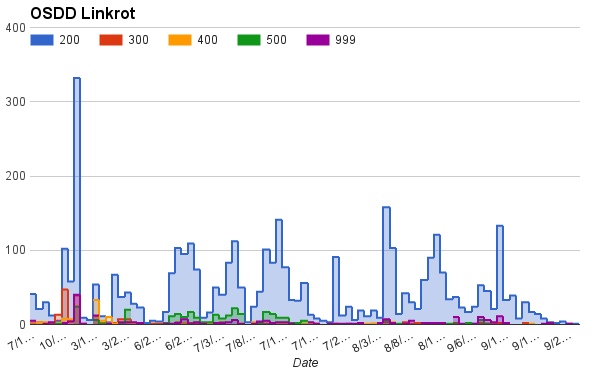

In [1]:
from IPython.display import Image
Image(filename='screenshots/osdd_linkrot_area.png') 

# this is not a good chart

| Date       | 200 | 300 | 400 | 500 | 999 | 
|------------|-----|-----|-----|-----|-----| 
| 7/17/2014  | 41  | 2   | 2   |     | 5   | 
| 7/29/2014  | 21  | 3   | 3   |     |     | 
| 7/30/2014  | 30  | 2   | 3   |     | 1   | 
| 7/31/2014  | 12  | 2   |     |     | 3   | 
| 10/27/2014 | 5   | 13  | 1   | 1   |     | 
| 10/28/2014 | 102 | 47  | 8   | 1   | 2   | 
| 10/29/2014 | 58  | 5   | 7   |     | 4   | 
| 10/30/2014 | 332 | 39  | 25  | 24  | 40  | 
| 3/4/2015   | 9   | 1   |     |     | 1   | 
| 3/6/2015   | 6   |     |     |     |     | 
| 3/12/2015  | 54  | 11  | 33  | 6   | 12  | 
| 3/13/2015  | 11  | 2   | 5   | 1   |     | 
| 3/15/2015  | 3   |     | 10  |     | 1   | 
| 3/18/2015  | 67  | 2   | 1   |     |     | 
| 3/19/2015  | 37  | 7   | 2   | 1   | 3   | 
| 3/20/2015  | 43  | 7   | 3   | 20  | 3   | 
| 6/16/2015  | 28  | 1   | 1   |     | 3   | 
| 6/18/2015  | 23  |     |     | 1   | 2   | 
| 6/19/2015  | 2   |     |     |     |     | 
| 6/20/2015  | 5   | 1   |     |     |     | 
| 6/22/2015  | 4   | 1   |     |     |     | 
| 6/23/2015  | 17  | 1   | 1   | 2   | 1   | 
| 6/24/2015  | 69  |     |     | 11  | 1   | 
| 6/25/2015  | 103 | 3   |     | 14  | 2   | 
| 6/26/2015  | 95  | 1   | 2   | 10  | 7   | 
| 6/27/2015  | 109 | 2   |     | 17  | 1   | 
| 6/28/2015  | 74  | 2   |     | 9   | 3   | 
| 6/29/2015  | 9   |     |     | 3   | 1   | 
| 7/1/2015   | 16  | 1   | 1   | 3   |     | 
| 7/2/2015   | 50  |     |     | 13  | 2   | 
| 7/3/2015   | 40  | 3   | 1   | 8   | 2   | 
| 7/4/2015   | 83  |     |     | 12  | 3   | 
| 7/5/2015   | 112 |     |     | 22  | 6   | 
| 7/6/2015   | 50  |     | 1   | 14  | 1   | 
| 7/7/2015   | 3   |     |     |     |     | 
| 7/8/2015   | 24  | 1   | 3   |     | 1   | 
| 7/9/2015   | 44  | 3   | 1   | 2   | 4   | 
| 7/10/2015  | 101 | 1   |     | 17  | 5   | 
| 7/11/2015  | 83  | 2   |     | 14  | 2   | 
| 7/12/2015  | 141 | 1   | 2   | 9   | 3   | 
| 7/13/2015  | 77  | 2   | 2   | 9   | 3   | 
| 7/14/2015  | 33  | 1   |     | 2   | 1   | 
| 7/15/2015  | 32  |     |     | 2   |     | 
| 7/16/2015  | 56  |     | 1   | 5   |     | 
| 7/17/2015  | 13  | 1   | 1   |     | 3   | 
| 7/18/2015  | 8   | 1   |     |     | 1   | 
| 7/19/2015  | 5   |     |     |     |     | 
| 7/21/2015  | 3   |     |     | 1   | 1   | 
| 7/22/2015  | 91  | 1   |     |     | 1   | 
| 7/28/2015  | 12  |     |     |     | 1   | 
| 7/29/2015  | 24  | 1   |     |     | 1   | 
| 7/30/2015  | 6   |     |     |     | 1   | 
| 7/31/2015  | 19  | 1   | 1   |     | 2   | 
| 8/1/2015   | 11  |     | 1   |     |     | 
| 8/2/2015   | 19  | 1   | 1   |     |     | 
| 8/3/2015   | 9   |     |     |     | 2   | 
| 8/4/2015   | 158 | 3   |     | 5   | 7   | 
| 8/5/2015   | 103 |     | 3   | 1   | 2   | 
| 8/6/2015   | 14  |     |     | 1   |     | 
| 8/7/2015   | 42  | 3   |     |     | 1   | 
| 8/8/2015   | 30  | 1   |     |     | 5   | 
| 8/9/2015   | 21  | 2   |     |     |     | 
| 8/10/2015  | 60  |     |     |     | 2   | 
| 8/11/2015  | 90  | 1   |     |     | 2   | 
| 8/12/2015  | 121 | 1   | 1   |     | 2   | 
| 8/13/2015  | 70  | 1   | 1   | 1   | 2   | 
| 8/14/2015  | 34  |     |     | 1   |     | 
| 9/2/2015   | 37  | 2   |     | 1   | 10  | 
| 9/3/2015   | 23  |     |     |     | 1   | 
| 9/4/2015   | 17  |     |     | 2   |     | 
| 9/6/2015   | 24  |     |     | 1   | 1   | 
| 9/7/2015   | 53  | 2   |     | 6   | 10  | 
| 9/8/2015   | 45  | 1   | 1   | 1   | 6   | 
| 9/9/2015   | 21  | 2   |     |     | 3   | 
| 9/10/2015  | 133 | 2   |     |     | 11  | 
| 9/11/2015  | 33  | 2   |     |     | 2   | 
| 9/12/2015  | 39  |     |     |     |     | 
| 9/13/2015  | 8   |     |     |     |     | 
| 9/14/2015  | 30  | 2   |     |     |     | 
| 9/15/2015  | 17  |     | 1   |     |     | 
| 9/16/2015  | 14  |     |     |     |     | 
| 9/17/2015  | 8   |     |     |     | 1   | 
| 9/18/2015  | 3   |     |     |     | 2   | 
| 9/19/2015  | 2   |     |     |     |     | 
| 9/20/2015  | 4   |     |     |     |     | 
| 9/22/2015  | 1   |     |     |     | 1   | 
| 9/23/2015  | 1   |     |     |     |     | 


and the unpivoted source sql:

```
with a as (
	select o.id, case when o.status_code is null then 999 else o.status_code end as status
	from osdds o
)
select a.status, count(a.status), r.initial_harvest_date::date
from osdds o join responses r on r.id = o.response_id
	join a on a.id = o.id
group by a.status, r.initial_harvest_date::date
order by r.initial_harvest_date::date ASC;
```

In [5]:
sql = """
with a as (
  select o.id, round(case when o.status_code is null then 900 else o.status_code end, -2) as status
  from osdds o
)
select a.status, count(a.status) as num, date_trunc('month', r.initial_harvest_date)::date as months
from osdds o join responses r on r.id = o.response_id
  join a on a.id = o.id
group by a.status, months
order by months ASC;
"""

df = pd.read_sql(sql, engine)
df.pivot(index='months', columns='status', values='num')

status,200.0,300.0,400.0,500.0,900.0
months,,,,,
2014-07-01,104,9,8,NaN,9
2014-10-01,497,104,41,26,46
2015-03-01,230,30,54,28,20
2015-06-01,538,12,4,67,21
2015-07-01,1126,20,14,133,44
2015-08-01,782,13,7,9,25
2015-09-01,513,13,2,11,48


As percents

| Month      | 200   | 300   | 400   | 500   | 900  | 
|------------|-------|-------|-------|-------|------| 
| 2014-07-01 | 80.00 | 6.92  | 6.15  | 0.00  | 6.92 | 
| 2014-10-01 | 69.61 | 14.57 | 5.74  | 3.64  | 6.44 | 
| 2015-03-01 | 63.54 | 8.29  | 14.92 | 7.73  | 5.52 | 
| 2015-06-01 | 83.80 | 1.87  | 0.62  | 10.44 | 3.27 | 
| 2015-07-01 | 84.22 | 1.50  | 1.05  | 9.95  | 3.29 | 
| 2015-08-01 | 93.54 | 1.56  | 0.84  | 1.08  | 2.99 | 
| 2015-09-01 | 87.39 | 2.21  | 0.34  | 1.87  | 8.18 | 


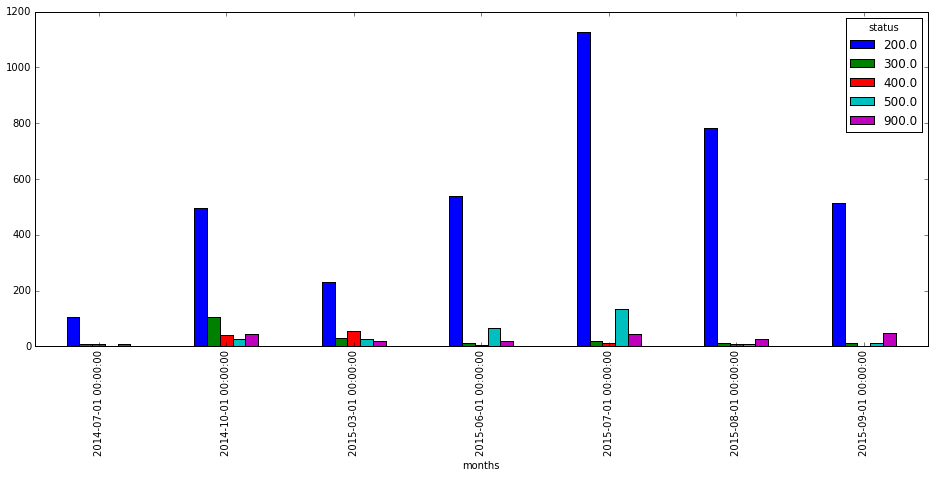

In [8]:
df.pivot(index='months', columns='status', values='num').plot(kind='bar', figsize=(16, 6))

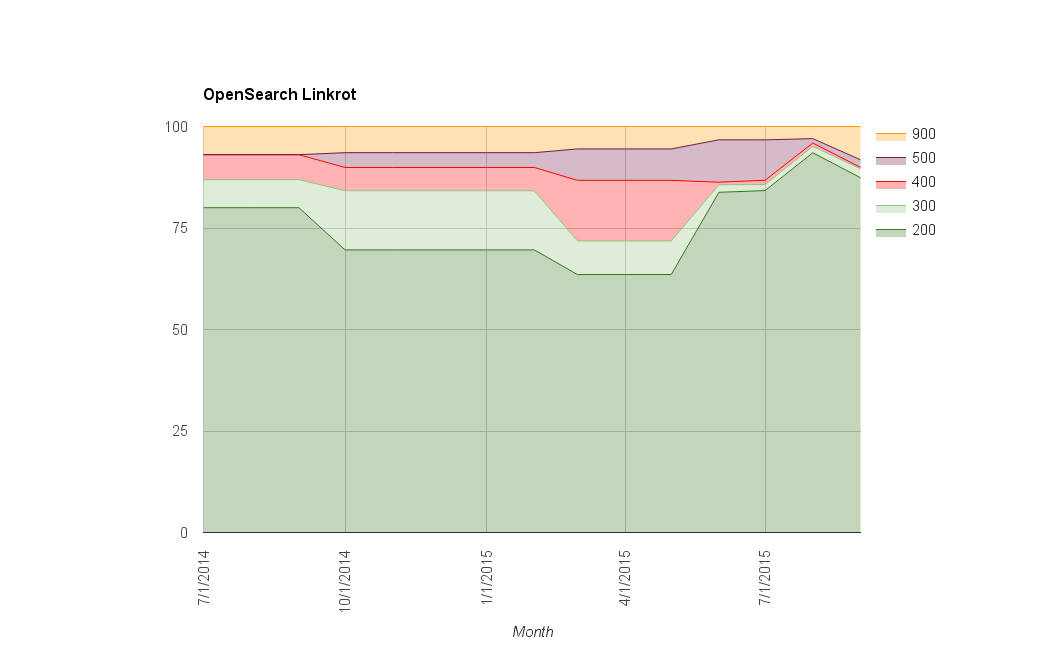

In [2]:
from IPython.display import Image
Image(filename='screenshots/opensearch_linkrot.png') 

## Onwards to the Templates!

So does it have a template? Are they for ATOM and/or RSS? Can you build a search URL from them and get a successful result?

In [9]:
sql = """
with a as (
    select id, 
        case when url_templates is not null and url_templates::text != '[]'::text then True else False end as has_templates
    from osdds
)
select has_templates, cnt, round(100.0*cnt/(sum(cnt) OVER ()), 2) as pct
from (select has_templates, count(*) as cnt from a group by has_templates) foo;
"""
df = pd.read_sql(sql, engine)
df

,has_templates,cnt,pct
0,False,4025,87.35
1,True,583,12.65


Not so many have templates.

(I generated these urls, see [other notebook] but there can be issues in that.)

How many have

default_urls? 577
search_urls? 559  (95%)
example_urls? 299 (51%)

For search urls, it means I could identify the searchTerms key. For example urls, those are built using the search url with the first item in the "example" element for that format.

It is tracking like the OSDD, at the very least, isn't meant to be public for most of these sites. OpenSearch for the site search under the hood but nothing visible (CMS' are doing this for RSS feeds - it's in the html but not displayed.) So that makes sense for not bothering with templates or examples - they're not meant to *be* publicly available services. 

In [13]:
sql = """
with t 
as (
    select o.id, x.*
    from osdds o, 
        jsonb_to_recordset(o.url_templates::jsonb) 
            as x(
                default_url text,
                search_url text,
                example_url text,
                responses jsonb,
                parameters jsonb,
                param_defs jsonb,
                accept_type text
            )
    where url_templates is not null and url_templates::text != '[]'::text
)

select t.accept_type, count(t.id)
from t
group by accept_type;
"""

df = pd.read_sql(sql, engine)
df

# accept_type here is the mimetype from the "type" tag of the template

,accept_type,count
0,application/atom+xml,465
1,text/atom+xml,5
2,application/rss+xml,377


Only 6 OSDDs included parameter definitions as a Parameter element.

How many parameters, defined in the template strings, include something to mark them as Dataset searches?

(spoiler, this isn't how cwic manages their own.)

In [14]:
sql = """
with t 
as (
    select o.id, x.*
    from osdds o, 
        jsonb_to_recordset(o.url_templates::jsonb) 
            as x(
                default_url text,
                search_url text,
                example_url text,
                responses jsonb,
                parameters jsonb,
                param_defs jsonb,
                accept_type text
            )
    where url_templates is not null and url_templates::text != '[]'::text
)

select distinct jsonb_object_keys(parameters) as key
from t
order by key;
"""
pd.read_sql(sql, engine)

,key
0,aH
1,andtext
2,any
3,anyText
4,b
5,bbox
6,borono
7,box
8,b_size:int
9,b_start:int


In [15]:
sql = """
with t 
as (
    select o.id, x.*
    from osdds o, 
        jsonb_to_recordset(o.url_templates::jsonb) 
            as x(
                default_url text,
                search_url text,
                example_url text,
                responses jsonb,
                parameters jsonb,
                param_defs jsonb,
                accept_type text
            )
    where url_templates is not null and url_templates::text != '[]'::text
)

select distinct kvps.value
from t, jsonb_each_text(parameters) as kvps
order by kvps.value;
"""

pd.read_sql(sql, engine)

,value
0,alf:guest?
1,alien:environment?
2,alien:impact?
3,bvh:borough?
4,bvh:county?
5,bvh:town?
6,chronam:booleanOrText?
7,chronam:city?
8,chronam:county?
9,chronam:date?


For the results of the secondary requests.

Starting with the search url (base url + default parameters + searchTerms without a term)

In [21]:
sql = """
with t 
as (
	select o.id, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				default_url text,
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)

select distinct t.search_url, t.accept_type, search_response->'status' as status_code, 
	search_response->'total' as total, 
	search_response->'subset' as subset, 
	search_response->'has_content' as has_content, 
	search_response->'error' as error,
	case when search_response->>'search_rels' != '{}' then True else False end as has_nested_search_urls
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb,
		example_response jsonb,
		default_response jsonb
	)
where search_response->>'status' != '{}'
;

"""

df = pd.read_sql(sql, engine)

from IPython.display import display
with pd.option_context('display.max_colwidth', 1000, 'display.max_rows', 810):
    display(df)

,search_url,accept_type,status_code,total,subset,has_content,error,has_nested_search_urls
0,http://101.datascience.community/?feed=atom&s=,application/atom+xml,200,Unknown,Unknown,True,None,False
1,http://101.datascience.community/?feed=rss2&s=,application/rss+xml,200,Unknown,Unknown,True,None,False
2,http://159.213.89.76:80/geonetwork/srv/ita/rss.search?hitsPerPage=5&any=,application/rss+xml,200,Unknown,Unknown,True,None,False
3,http://aac.colostate.edu/SearchResults.ashx?q=,application/atom+xml,200,0,20,True,None,True
4,http://academiccommons.columbia.edu/catalog.rss?q=,application/rss+xml,200,Unknown,Unknown,True,None,False
5,http://accesscenter.colostate.edu/SearchResults.ashx?q=,application/atom+xml,200,0,20,True,None,True
6,http://acmw.rpi.edu/?feed=atom&s=,application/atom+xml,200,None,None,True,HTML response,False
7,http://acmw.rpi.edu/?feed=rss2&s=,application/rss+xml,200,None,None,True,HTML response,False
8,http://admissions.chem.ox.ac.uk/SearchResults.ashx?q=,application/atom+xml,200,0,10,True,None,True
9,http://admissions.colostate.edu/SearchResults.ashx?q=,application/atom+xml,404,None,None,True,HTML response,False


In [10]:
# how many of the search urls (and there can be more than one per OSDD!)
# return a 200 OK?

sql = """
with t 
as (
	select o.id, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				default_url text,
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)

select round((search_response->'status')::text::int, -2) as code,
    t.accept_type,
	count(distinct t.search_url) as num
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb,
		example_response jsonb,
		default_response jsonb
	)
where search_response->>'status' != '{}'
group by code, t.accept_type
order by code asc, t.accept_type
;
"""
df = pd.read_sql(sql, engine)
df

# out of 559 responses with search urls

,code,accept_type,num
0,200,application/atom+xml,393
1,200,application/rss+xml,301
2,400,application/atom+xml,23
3,400,application/rss+xml,22
4,400,text/atom+xml,1
5,500,application/atom+xml,5
6,500,application/rss+xml,15


In [3]:
# by actual response count (above is the urls, can be more than one per response)
sql = """
with t 
as (
	select o.id, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)
select count(distinct t.id) as responses
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb,
		example_response jsonb,
		default_response jsonb
	)
where search_response->>'status' != '{}'
	and round((search_response->'status')::text::int, -2) = 200
;
"""
df = pd.read_sql(sql, engine)
df

# so about 88% have a good search url

,responses
0,491


In [11]:
# for the example urls

sql = """
with t 
as (
	select o.id, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				default_url text,
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)

select round((example_response->'status')::text::int, -2) as code,
	t.accept_type,
	count(distinct t.example_url) as num
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb,
		example_response jsonb,
		default_response jsonb
	)
where example_response->>'status' != '{}'
group by code, t.accept_type
order by code asc, t.accept_type
;

"""

df = pd.read_sql(sql, engine)
df

# out of 299 responses with example urls

,code,accept_type,num
0,200,application/atom+xml,218
1,200,application/rss+xml,264
2,400,application/atom+xml,6
3,400,application/rss+xml,8
4,500,application/atom+xml,1
5,500,application/rss+xml,3


In [4]:
# by actual response count (above is the urls, can be more than one per response)
sql = """
with t 
as (
	select o.id, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)
select count(distinct t.id) as responses
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb,
		example_response jsonb,
		default_response jsonb
	)
where example_response->>'status' != '{}'
	and round((example_response->'status')::text::int, -2) = 200
;
"""
df = pd.read_sql(sql, engine)
df

# so about 92% have a good search url

,responses
0,275


In [12]:
# and the default urls
sql = """
with t 
as (
	select o.id, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				default_url text,
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)

select round((default_response->'status')::text::int, -2) as code,
	t.accept_type,
	count(distinct t.default_url) as num
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb,
		example_response jsonb,
		default_response jsonb
	)
where default_response->>'status' != '{}'
group by code, t.accept_type
order by code asc, t.accept_type
;
"""
df = pd.read_sql(sql, engine)
df

,code,accept_type,num
0,200,application/atom+xml,230
1,200,application/rss+xml,136
2,400,application/atom+xml,25
3,400,application/rss+xml,24
4,400,text/atom+xml,3
5,500,application/atom+xml,6
6,500,application/rss+xml,16


In [ ]:
# for the search urls, what do we find in the results?
# a quick round of good does it include pagination info?
# additional OSDD links?

sql = """
with t 
as (
	select o.id, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				default_url text,
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)

select distinct t.search_url, t.accept_type, search_response->'status' as status_code, 
	search_response->'total' as total, 
	search_response->'subset' as subset, 
	search_response->'has_content' as has_content, 
	search_response->'error' as error,
	case when search_response->>'search_rels' != '{}' then True else False end as has_nested_search_urls
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb
	)
where search_response->>'status' != '{}' and 
	(search_response->'total')::text != '' and (search_response->'total')::text != '"Unknown"'
	and (search_response->'total')::text != '"0"'
;
"""

# for example

For the search set, of 760 requests (atom or rss), only 61 returned a result set, 181 returned an empty resultset. 406 return a total count of "Unknown". 

547 of the responses contain some reference to another search URL. This does not necessarily indicate a nested search structure, ie the dataset->granule concept. From the processing, this is a link in the search results with the "application/opensearchdescription+xml" type. There's no directionality attribute to these link elements so it could be the original OSDD reference or a nested search link.

In [13]:
# for the search responses, do they contain an OSDD 
# search link and does that link match the original OSDD url?
# we don't expect it to match the search url, that would be tagged
# as "self" in the link rel.


# the set where the source url doesn't match the resultset search osdd.
sql = """
with t 
as (
	select o.id, o.url, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				default_url text,
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)

select distinct t.search_url, t.accept_type, 
    t.url,
	trim(both '"' from (v.value->'link_url')::text) as search_rel_osdd
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb
	), 
	jsonb_array_elements(search_response->'search_rels') v
where search_response->>'status' != '{}' and search_response->>'search_rels' != '{}'
	and position(trim(both '"' from (v.value->'link_url')::text) in t.url) < 1
;
"""

df = pd.read_sql(sql, engine)
df

,search_url,accept_type,url,search_rel_osdd
0,http://advanceddataanalytics.net/?feed=atom&s=,application/atom+xml,http://advanceddataanalytics.net/osd.xml,https://wordpress.com/opensearch.xml
1,http://agriculturalwithdrlindsay.com/?feed=ato...,application/atom+xml,http://agriculturalwithdrlindsay.com/osd.xml,https://wordpress.com/opensearch.xml
2,http://ambassadors.nescent.org/?feed=atom&s=,application/atom+xml,http://ambassadors.nescent.org/osd.xml,https://wordpress.com/opensearch.xml
3,http://antimoneylaundering.eu/?feed=atom&s=,application/atom+xml,http://antimoneylaundering.eu/osd.xml,https://wordpress.com/opensearch.xml
4,http://barcelonaservicejam.org/?feed=atom&s=,application/atom+xml,http://barcelonaservicejam.org/osd.xml,https://wordpress.com/opensearch.xml
5,http://barsummit.org/?feed=atom&s=,application/atom+xml,http://barsummit.org/osd.xml,http://seaoscsummit.org/osd.xml
6,http://barsummit.org/?feed=atom&s=,application/atom+xml,http://barsummit.org/osd.xml,https://wordpress.com/opensearch.xml
7,http://barsummit.org/?feed=rss2&s=,application/rss+xml,http://barsummit.org/osd.xml,http://seaoscsummit.org/osd.xml
8,http://bclines.bethelks.edu/?feed=atom&s=,application/atom+xml,http://bclines.bethelks.edu/osd.xml,https://wordpress.com/opensearch.xml
9,http://beh.columbia.edu/?feed=atom&s=,application/atom+xml,http://beh.columbia.edu/osd.xml,https://wordpress.com/opensearch.xml


In [18]:
# that's a little hard to see
# but 200 of the 700+ search urls have what might
# be a nested url option
for t in df.itertuples():
    print t[1]
    print '\tsrc: ', t[3]
    print '\tset: ', t[4]

http://advanceddataanalytics.net/?feed=atom&s=
	src:  http://advanceddataanalytics.net/osd.xml
	set:  https://wordpress.com/opensearch.xml
http://agriculturalwithdrlindsay.com/?feed=atom&s=
	src:  http://agriculturalwithdrlindsay.com/osd.xml
	set:  https://wordpress.com/opensearch.xml
http://ambassadors.nescent.org/?feed=atom&s=
	src:  http://ambassadors.nescent.org/osd.xml
	set:  https://wordpress.com/opensearch.xml
http://antimoneylaundering.eu/?feed=atom&s=
	src:  http://antimoneylaundering.eu/osd.xml
	set:  https://wordpress.com/opensearch.xml
http://barcelonaservicejam.org/?feed=atom&s=
	src:  http://barcelonaservicejam.org/osd.xml
	set:  https://wordpress.com/opensearch.xml
http://barsummit.org/?feed=atom&s=
	src:  http://barsummit.org/osd.xml
	set:  http://seaoscsummit.org/osd.xml
http://barsummit.org/?feed=atom&s=
	src:  http://barsummit.org/osd.xml
	set:  https://wordpress.com/opensearch.xml
http://barsummit.org/?feed=rss2&s=
	src:  http://barsummit.org/osd.xml
	set:  http://s

In [19]:
# how many aren't wordpress links then?

sql = """
with t 
as (
	select o.id, o.url, x.*
	from osdds o, 
		jsonb_to_recordset(o.url_templates::jsonb) 
			as x(
				default_url text,
				search_url text,
				example_url text,
				responses jsonb,
				accept_type text
			)
	where url_templates is not null and url_templates::text != '[]'::text
)

select distinct t.search_url, t.accept_type, 
    t.url,
	trim(both '"' from (v.value->'link_url')::text) as search_rel_osdd
from t,
	jsonb_to_recordset(responses) as y(
		search_response jsonb
	), 
	jsonb_array_elements(search_response->'search_rels') v
where search_response->>'status' != '{}' and search_response->>'search_rels' != '{}'
	and position(trim(both '"' from (v.value->'link_url')::text) in t.url) < 1
    and trim(both '"' from (v.value->'link_url')::text) != 'https://wordpress.com/opensearch.xml'
;
"""

df = pd.read_sql(sql, engine)
df

,search_url,accept_type,url,search_rel_osdd
0,http://barsummit.org/?feed=atom&s=,application/atom+xml,http://barsummit.org/osd.xml,http://seaoscsummit.org/osd.xml
1,http://barsummit.org/?feed=rss2&s=,application/rss+xml,http://barsummit.org/osd.xml,http://seaoscsummit.org/osd.xml
2,http://blog.wikimedia.org/?feed=atom&s=,application/atom+xml,https://blog.wikimedia.org/osd.xml,http://blog.wikimedia.org/osd.xml
3,http://blog.wikimedia.org/?feed=rss2&s=,application/rss+xml,https://blog.wikimedia.org/osd.xml,http://blog.wikimedia.org/osd.xml
4,http://caspian.iwlearn.org/opensearch_atom.xml...,application/atom+xml,http://caspian.iwlearn.org/@@opensearch_descri...,http://caspian.iwlearn.org/opensearch_descript...
5,http://caspian.iwlearn.org/opensearch_rss.xml?...,application/rss+xml,http://caspian.iwlearn.org/@@opensearch_descri...,http://caspian.iwlearn.org/opensearch_descript...
6,http://chroniclingamerica.loc.gov/search/title...,application/atom+xml,http://chroniclingamerica.loc.gov/search/title...,/search/pages/opensearch.xml
7,http://core.tdar.org/search/rss?query=,application/atom+xml,http://core.tdar.org/opensearch.xml,http://core.tdar.org/includes/opensearch.xml
8,http://eo-virtual-archive4.esa.int/search/atom...,application/atom+xml,http://eo-virtual-archive4.esa.int/search/desc...,http://eo-virtual-archive4.esa.int/search/ASA_...
9,http://eo-virtual-archive4.esa.int/search/atom...,application/atom+xml,http://eo-virtual-archive4.esa.int/search/desc...,http://eo-virtual-archive4.esa.int/search/ER01...


So 30 possibles, 6 are just HTTP v HTTPS, so now just 24. And eyeballing the list, there are really just 5 that look like a nested search:

| Original OSDD                                           | Resultset rel=search OSDD                                                | 
|---------------------------------------------------------|--------------------------------------------------------------------------| 
| "http://eo-virtual-archive4.esa.int/search/description" | "http://eo-virtual-archive4.esa.int/search/ASA_IM__0P/description/"      | 
| "http://eo-virtual-archive4.esa.int/search/description" | "http://eo-virtual-archive4.esa.int/search/ER01_SAR_IM__0P/description/" | 
| "http://eo-virtual-archive4.esa.int/search/description" | "http://eo-virtual-archive4.esa.int/search/ER02_SAR_IM__0P/description/" | 
| "http://eo-virtual-archive4.esa.int/search/description" | "http://eo-virtual-archive4.esa.int/search/ER02_SAR_RAW_0P/description/" | 
| "http://eo-virtual-archive4.esa.int/search/description" | "http://eo-virtual-archive4.esa.int/search/SSEP_ASA_IM__0P/description/" | 

Those look a lot like short code-style identifiers. But! While it probably is a granule search, it's using the URL route to indicate the dataset rather than an OpenSearch parameter.
